In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [6]:

data = load_breast_cancer()
X = data.data
y = data.target


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [9]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC Score:", roc_auc)


Confusion Matrix:
 [[41  2]
 [ 1 70]]
Precision: 0.9722222222222222
Recall: 0.9859154929577465
ROC AUC Score: 0.99737962659679


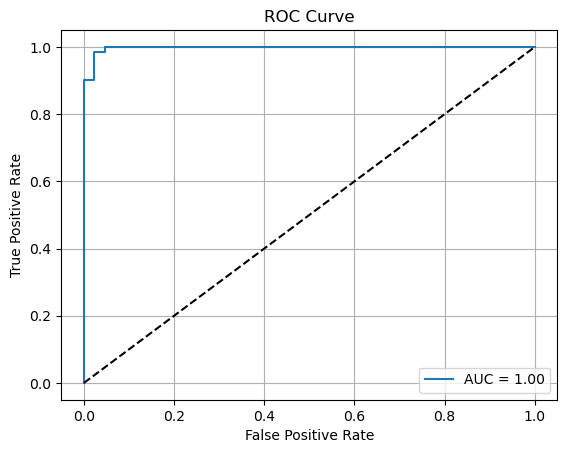

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:
y_pred_default = (y_proba >= 0.5).astype(int)
cm_default = confusion_matrix(y_test, y_pred_default)

# Custom threshold: 0.4
threshold = 0.4
y_pred_custom = (y_proba >= threshold).astype(int)
cm_custom = confusion_matrix(y_test, y_pred_custom)

print("Confusion Matrix (Threshold = 0.5):\n", cm_default)
print("Confusion Matrix (Threshold = 0.4):\n", cm_custom)
print("Precision (0.4):", precision_score(y_test, y_pred_custom))
print("Recall (0.4):", recall_score(y_test, y_pred_custom))

Confusion Matrix (Threshold = 0.5):
 [[41  2]
 [ 1 70]]
Confusion Matrix (Threshold = 0.4):
 [[41  2]
 [ 0 71]]
Precision (0.4): 0.9726027397260274
Recall (0.4): 1.0


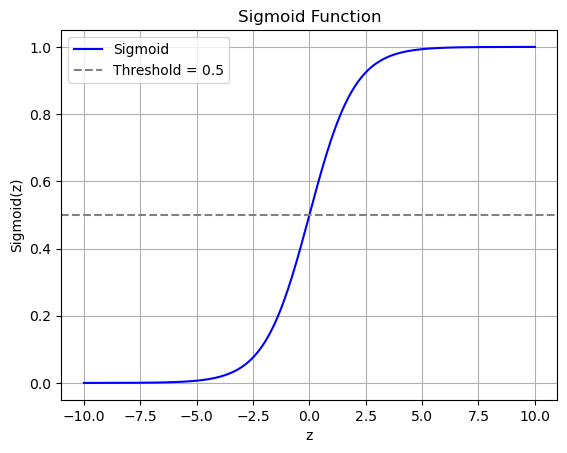

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
plt.plot(z, sigmoid(z), label="Sigmoid", color="blue")
plt.axhline(0.5, color='gray', linestyle='--', label='Threshold = 0.5')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.legend()
plt.show()